In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DNA_SIZE = 1
DNA_BOUND = [0, 5]
N_GENERATIONS = 50
POP_SIZE = 100
N_KID = 50 # 每代繁殖数量

In [3]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

In [4]:
def get_fitness(pred):
    return pred.flatten()

# 根据正态分布产生子代
def make_kid(pop, n_kid):
    kids = {'DNA': np.empty((n_kid, DNA_SIZE))}
    kids['mut_strength'] = np.empty_like(kids['DNA'])
    
    for kv, ks in zip(kids['DNA'], kids['mut_strength']):
        # 基因重组
        p1, p2 = np.random.choice(np.arange(POP_SIZE), 
            size=2, replace=False)
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)
        kv[cp] = pop['DNA'][p1, cp]
        kv[~cp] = pop['DNA'][p2, ~cp]
        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]
    
        # 变异
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)
        kv += ks * np.random.randn(*kv.shape)
        kv[:] = np.clip(kv, *DNA_BOUND)
        
    return kids
    
# 淘汰落后个体
def kill_bad(pop, kids):
    for key in ['DNA', 'mut_strength']:
        pop[key] = np.vstack((pop[key], kids[key]))
        
    fitness = get_fitness(F(pop['DNA']))
    idx = np.arange(pop['DNA'].shape[0])
    good_idx = idx[fitness.argsort()][-POP_SIZE:]
    for key in ['DNA', 'mut_strength']:
        pop[key] = pop[key][good_idx]
    return pop

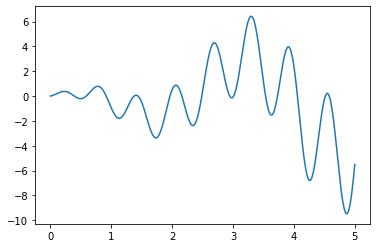

In [5]:
pop = dict(
    DNA=5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),
    mut_strength = np.random.rand(POP_SIZE, DNA_SIZE)
          )

plt.ion()       # something about plotting
x = np.linspace(*DNA_BOUND, 200)
plt.plot(x, F(x))

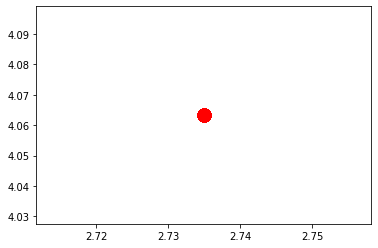

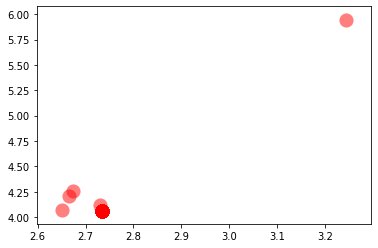

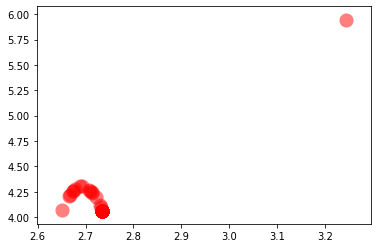

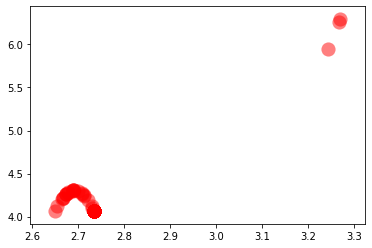

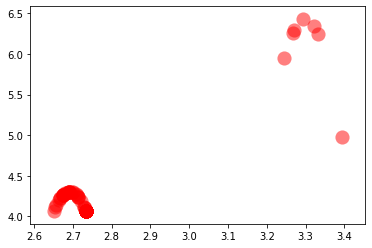

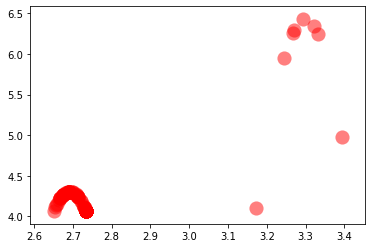

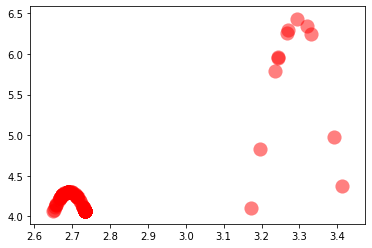

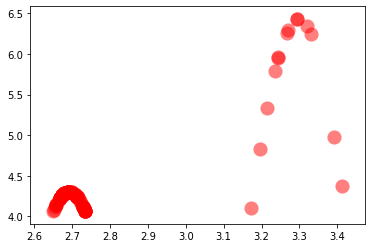

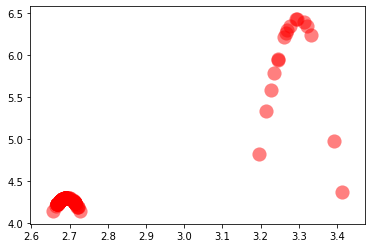

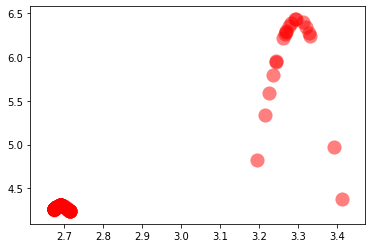

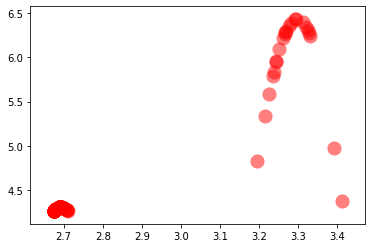

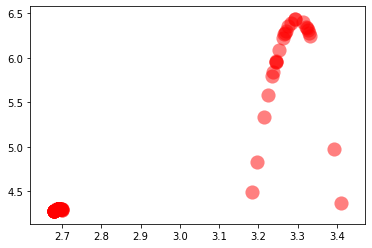

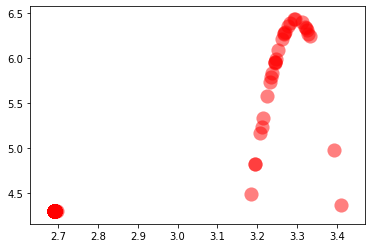

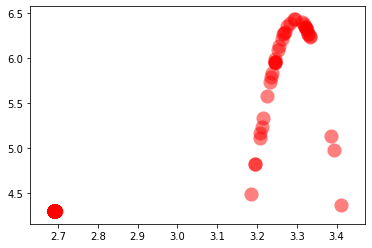

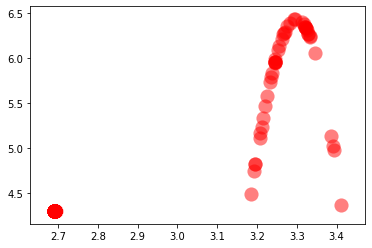

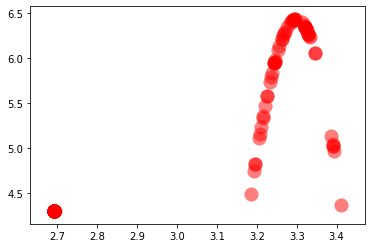

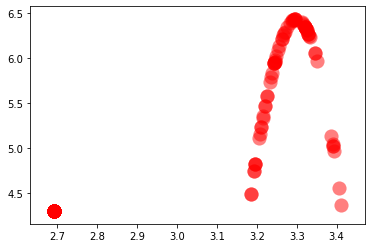

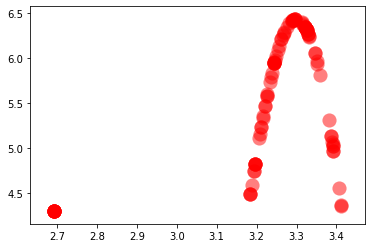

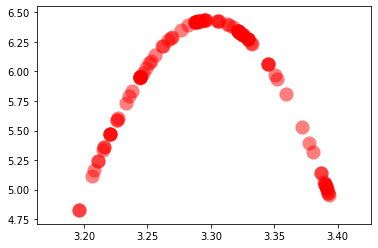

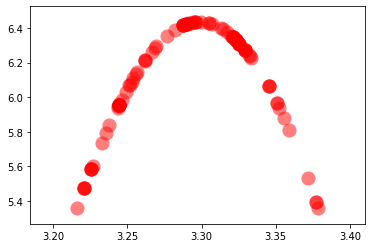

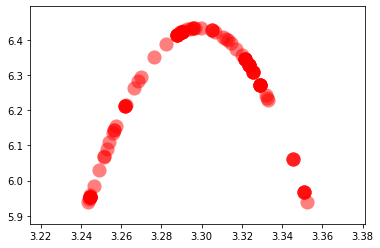

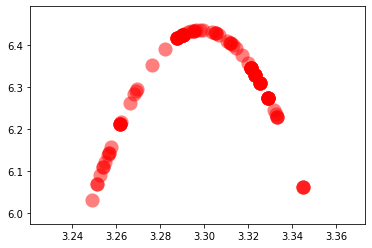

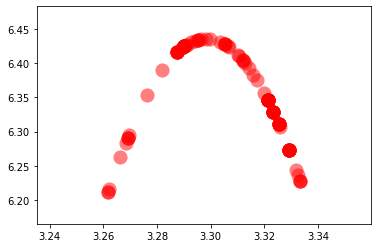

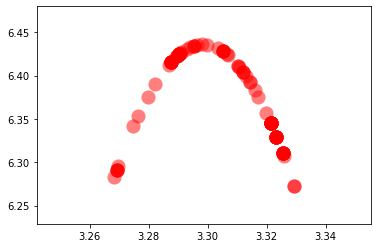

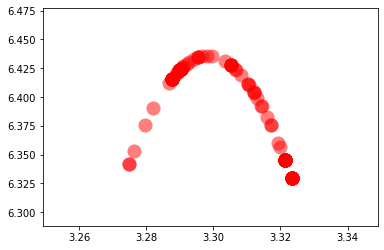

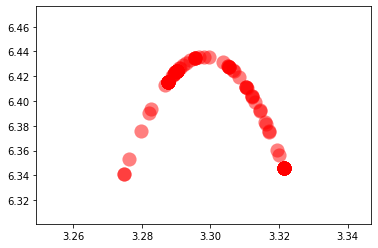

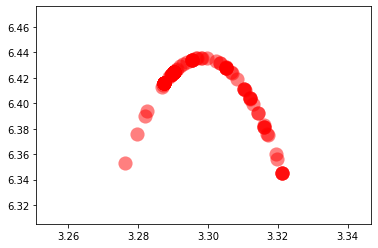

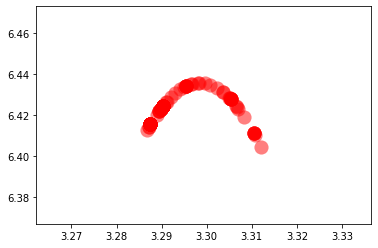

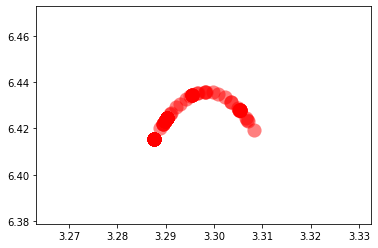

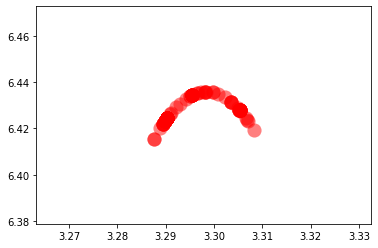

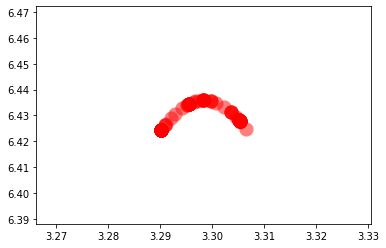

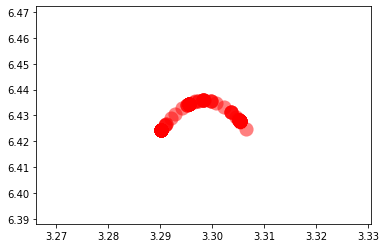

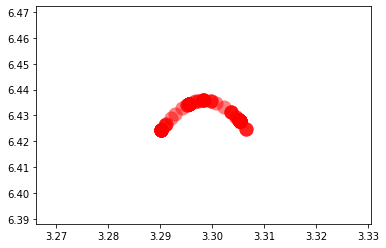

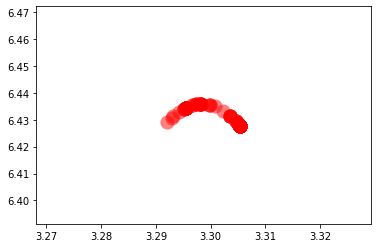

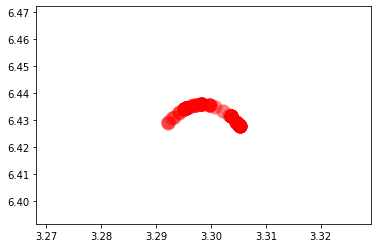

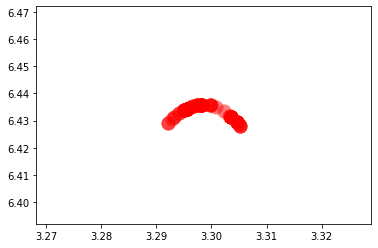

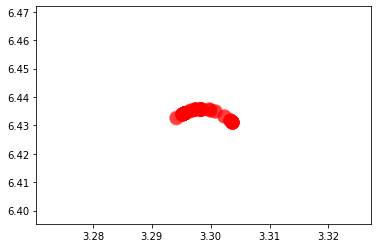

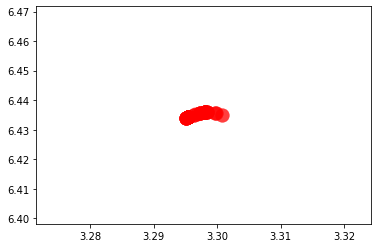

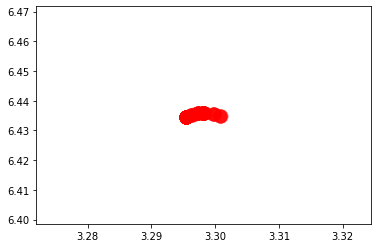

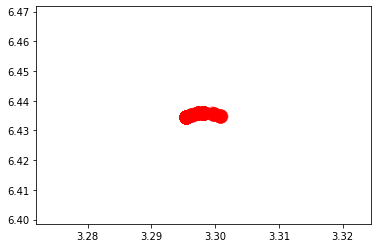

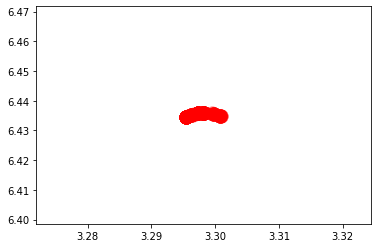

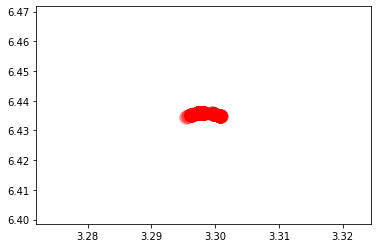

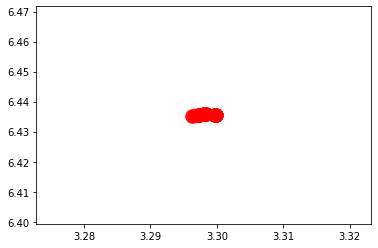

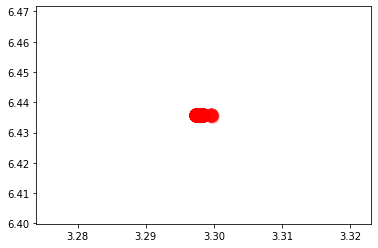

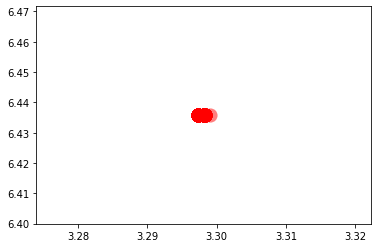

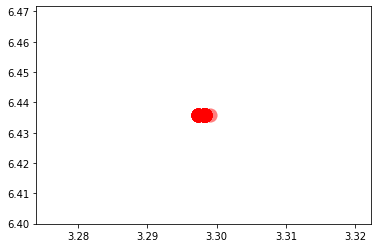

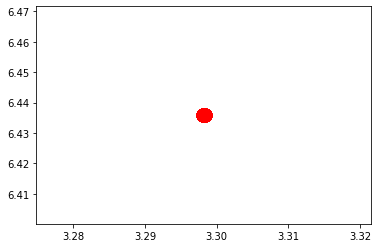

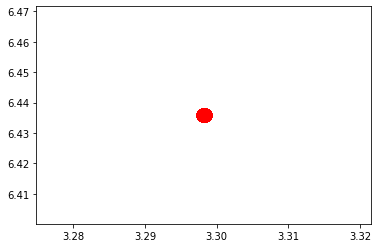

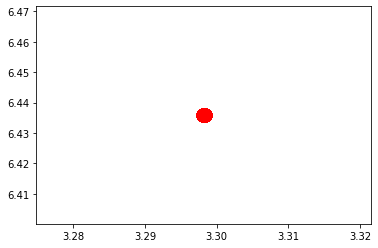

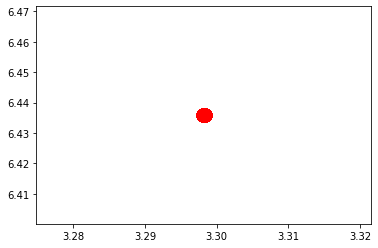

In [6]:
for _ in range(N_GENERATIONS):
    # something about plotting
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(pop['DNA'], 
        F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)
    plt.pause(0.05)

    # ES part
    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)

plt.ioff()
plt.show()